<a href="https://colab.research.google.com/github/xiaochengJF/DeepLearning/blob/master/%E5%B0%8F%E5%9E%8B%E7%A5%9E%E7%BB%8F%E7%BD%91%E7%BB%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/gdrive/")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [2]:
cd /content/gdrive/My Drive/My/

/content/gdrive/My Drive/My


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math
import random
import os

In [0]:
class Activation:
    def __init__(self, wRange = 1, bRange = 1):
        self.wRange = wRange
        self.bRange = bRange
        
    # 初始化权重  wx + b =  w(x + b/w) = w(x + h)  -> h = b/w ,w决定了函数的x方向的缩放，h决定了缩放后x方向的平移
    # 初始化权重并不是一个随机初始化的过程，我们测试中发现，在对s型函数拟合的过程中，务必把函数进行合适的缩放，然后初始化偏移，让其均匀地分布在整个整个输入空间
    # 但对relu类型的函数，w可以设置为+1，-1即可，只要改变初始偏移即可完成相应的拟合
    def initWeight(self, cell):
        for i in range(len(cell.w)):
            cell.w[i] = self.wRange * random.choice([1., -1.])
        cell.b = (self.bRange * self.wRange) * random.uniform(-1, 1)
        if (cell.specialCellType):
            for i in range(len(cell.w)):
                cell.h[i] = (self.bRange) * random.uniform(-1, 1)
    
    def activation_fun(self, x):
        raise NotImplemented("") # ?????????????????
        
    def activation_deri_fun(self, cell):
        raise NotImplemented("")
        
    # 权重差值,求出来的偏导为
    # △loss/△w = deri, （1）
    # 如果令 △w = -speed*deri  （2）
    # 令2代入1可以导出
    #   △loss = deri*△w  = - speed*deri*deri, loss是往恒往小的方向进行的
    # 但是这个更新策略并不是唯一的策略，只要令△loss实际是往减小方向的策略理论上都是可以的，比如我们,在deri不为零的前提下
    # 令  △w = -speed/deri  （3）
    # 代入1,可得 △loss = -speed,  即每更新一步，△loss是以固定速度减小的
    # 但是在(3)式的策略其实也可能有一些其他的问题，比如我们的偏导deri只是在当前w的一个很小的邻域内才成立，所以一定要限制△w 的范围，
    # 梯度下降的策略很有多种，可以参考下面文章：
    # http://www.360doc.com/content/16/1121/12/22755525_608221032.shtml    
    def updateDeltaWeight(self, deri, speed, cell, loss, coefficient):
        return -speed * deri

In [0]:
#梯度很容易爆炸，但可以通过修改更新权重的策略让其拟合一些函数
class ActivationXX(Activation):
    def activation_fun(self, x):
        if (abs(x) > 1):
            x = 1
        return x * x
    
    def activation_deri_fun(self, cell):
        if (abs(cell.sum) > 1):
            return 0
        return 2 * cell.sum

In [0]:
# V型函数
class activationAbsolute(Activation):
    def activation_fun(self, x):
        return abs(x)
    
    def activation_deri_fun(self, cell):
        return 1.0 if cell.sum < 0.0 else 1.0 # ???????不是-1吗

In [0]:
# Sinc函数
class ActivationSinc(Activation):
    def activation_fun(self, x):
        return 1.0 if x == 0.0 else math.sin(x) / x
    
    def activatiom_deri_fun(self, cell):
        x = cell.sum
        return 1.0 if x == 0.0 else math.cos(x) / x - math.sin(x) / (x * x)

In [0]:
# Tanh
class ActivationTanh(Activation):
    def activation_fun(self, x):
        return math.tanh(x)

    def activation_deri_fun(self, cell):
        return 1 - cell.out * cell.out

In [0]:
# Relu
class ActivationRelu(Activation):
    def activation_fun(self, x):
        return max(0.0, x)

    def activation_deri_fun(self, cell):
        return 0.0 if cell.sum <= 0. else 1.0

In [0]:
# MyRelu
class ActivationMyRelu(Activation):  # 往右平移了一下
    def activation_fun(self, x):  
        return max(0.0, x - 0.5)

    def activation_deri_fun(self, cell): 
        return 0.0 if cell.sum <= 0. else 1.0

In [0]:
# LeakyRelu
class ActivationLeakyRelu(Activation):
    def activation_fun(self, x):
        return x if x > 0.0 else 0.01 * x

    def activation_deri_fun(self, cell):
        return 0.01 if cell.sum <= 0  else 1.0

In [0]:
# 阶跃函数
class ActivationStep(Activation):  # 0  ，-  1
    def activation_fun(self, x): 
        return 1.0 if x >= 0 else 0

    def activation_deri_fun(self, cell): 
        return 0

In [0]:
# Signum
class ActivationSignum(Activation):  # 1 ， -  1
    def activation_fun(self, x): 
        return 1.0 if x >= 0 else -1.0

    def activation_deri_fun(self, cell): 
        return 0.0

In [0]:
# ln(1 + e^x)
class ActivationSoftPlus(Activation):
    def activation_fun(self, x):
        return math.log(1 + math.exp(x))

    def activation_deri_fun(self, cell):
        return 1 / (1 + math.exp(-cell.sum))

In [0]:
# LeCun Tanh
class ActivationLecunTanh(Activation):  
    def activation_fun(self, x):
        return 1.7519 * math.tanh(2 * x / 3) 

    def activation_deri_fun(self, cell):
        return 1.7519 * 2 * (1 - cell.out * cell / (1.7519 * 1.7519)) / 3

In [0]:
# Hard Tanh
class ActivationHardTanh(Activation):
    def activation_fun(self, x):
        return 1 if x > 1.0 else (-1 if x < -1.0 else x)

    def activation_deri_fun(self, cell):
        return 1 if abs(x) < 1.0 else 0


In [0]:
# ArcTan
class ActivationArcTan(Activation): 
    def activation_fun(self, x):
        return math.atan(x)  #

    def activation_deri_fun(self, cell):
        return 1 / (cell.sum * cell.sum + 1)

In [0]:
# x/(1 + |x|)
class ActivationSoftsign(Activation): 
    def activation_fun(self, x):
        return x / (1 + abs(x)) 

    def activation_deri_fun(self, cell): 
        return 1 / ((1 + abs(cell.sum)) * (1 + abs(cell.sum)))

In [0]:
# Sigmoid
class ActivationSigmoid(Activation):
    def activation_fun(self, x):  # 激活函数
        try:
            return 1 / (1 + math.exp(-x))
        except OverflowError:
            if x < 0.0:
                return 0
            else:
                return 1;

    def activation_deri_fun(self, cell):  # 偏导
        return cell.out * (1 - cell.out)

        # def updateDeltaWeight(self,deri,speed,cell,loss,coefficient):            ##权重差值,这种策略貌似会更快一点
        #     sigmoidDri = abs(cell.out * (1 - cell.out))
        #     if((sigmoidDri) < 0.1):      #梯度太小，不处理
        #         return 0.0
        #     coefficient = abs(coefficient)
        #     coefficient = max(coefficient,0.1)
        #     maxDelta = (0.3/coefficient)*sigmoidDri                          #一次的x变化不能太大
        #
        #     if abs(deri) > 0.000001:
        #         delta = (speed/deri) * loss
        #     else:
        #         return 0.0
        #     if abs(delta) > maxDelta:
        #         delta = maxDelta if delta > 0 else -maxDelta
        #     return -delta


In [0]:
# 正态分布
class ActivationNormal(Activation):
    def activation_fun(self, x):
        return math.exp(-x * x)  # ?????????????????????

    def activation_deri_fun(self, cell):
        return -cell.out * 2 * cell.sum  # cell ????????????????

In [0]:
# tanh(x/2)
class ActivationTanh(Activation):
    def activation_fun(self, x):
        return (1 - math.exp(-x)) / (1 + math.exp(-x))

    def activation_deri_fun(self, cell):
        return 0.5 * (1 - cell.out * cell.out)

In [153]:
|# loglog
class ActivationLogLog(Activation):
    def activation_fun(self, x):
        return 1 - math.exp(-math.exp(x))

    def activation_deri_fun(self, cell):
        return math.exp(cell.sum) * cell.out

SyntaxError: ignored

In [0]:
# cos函数
class ActivationCos(Activation):
    def activation_fun(self, x):
        return math.cos(x)

    def activation_deri_fun(self, cell):
        return math.sin(cell.sum)

In [0]:
# sin函数
class ActivationSin(Activation):
    #　？?????
    def initWeight(self, cell):
        for i in range(len(cell.w)):
            cell.w[i] = self.wRange * random.choice([1., -1.]) * random.uniform(0.01, 1)
        cell.b = (self.bRange * self.wRange) * random.uniform(-1, 1)

    def activation_fun(self, x):
        return math.sin(x)

    def activation_deri_fun(self, cell):
        return math.cos(cell.sum)

In [0]:
# 线性函数
class ActivationLiner(Activation):
    def activation_fun(self, x):  # 激活函数
        return x

    def activation_deri_fun(self, cell):  # 偏导
        return 1
        # def updateDeltaWeight(self,deri,speed,cell,loss,coefficient):
        #     return 0.       #暂时先强制为0，测试

In [0]:
# Cell有两种，一种是以 ∑wi*xi + b 作为输出  ,特殊的是以∑(abs(wi*(xi + hi)))作为输出
class Cell:
    def __init__(self, activation, specialCellType):
        self._activation = activation
        self.inputCell = None
        self.sum = 0.0
        self.out = 0.0
        self.error = 0.0
        self.specialCellType = specialCellType
        
    def setInputCells(self, inputCell):
        self.inputCell = inputCell
        self.w = [0 for i in range(len(inputCell))]
        self.delta_w = [0 for i in range(len(inputCell))]
        if (self.specialCellType):
            self.h = [0 for i in range(len(inputCell))]
            self.delta_h = [0 for i in range(len(inputCell))]
        self.b = 0.0
        self.delta_b = 0.0
        if (self._activation):
            self._activation.initWeight(self)
    
    # 计算输出???????
    def caculateOut(self):
        sum = 0.0
        i = 0
        for cell in self.inputCell:
            if self.specialCellType:
                sum += abs(self.w[i] * (cell.out + self.h[i]))
            else:
                sum += self.w[i] * cell.out
            i += 1
        if not self.specialCellType:
            sum += self.b
        self.sum = sum
        self.out = self._activation.activation_fun(sum)
    
    def updateWeight(self, speed, loss):
        if self.inputCell:
            i = 0
            outDeri = self.error * self._activation.activation_deri_fun(self)
            for cell in self.inputCell:
                if self.specialCellType:
                    deri = (cell.out + self.h[i]) * outDeri
                    if self.delta_w[i] * (cell.out + self.h[i]) < 0.:
                        deri = -deri
                else:
                    deri = cell.out * outDeri
                self.delta_w[i] = self._activation.updateDeltaWeight(deri, speed, self, loss, cell.out)
                self.w[i] += self.delta_w[i]

                if self.specialCellType:
                    hDeri = outDeri if self.w[i] > 0 else -outDeri  # self.w[i]*outDeri
                    if (cell.out + self.h[i]) < 0.:  # 绝对值，特殊处理一下
                        hDeri = -hDeri;
                    self.delta_h[i] = self._activation.updateDeltaWeight(hDeri, speed, self, loss, cell.out)
                    self.h[i] += self.delta_h[i]
                i += 1
            if not self.specialCellType:
                deri = outDeri
                self.delta_b = self._activation.updateDeltaWeight(deri, speed, self, loss, 1)
                self.b += self.delta_b

In [0]:
class Layer:
    def __init__(self, lastLayer=None, cellNum=1, activation=None, specialCellType=False):
        self._lastLayer = lastLayer
        self._cellNum = cellNum
        self.cells = [Cell(activation, specialCellType) for i in range(cellNum)]
        self._nextLayer = None
        if lastLayer:
            lastLayer._nextLayer = self
            for cell in self.cells:
                cell.setInputCells(lastLayer.cells)

    def _forward(self):  # 第一个层调用
        nextLayer = self._nextLayer
        while nextLayer:
            for cell in nextLayer.cells:
                cell.caculateOut()
            nextLayer = nextLayer._nextLayer

    def setInputAndForward(self, x):  # 仅第一层调用

        for i in range(len(self.cells)):
            self.cells[i].out = x[i]
        self._forward()

    def backPropagation(self, speed, loss):  # 最后一个层调用,往前跑
        currLayer = self
        lastLayer = self._lastLayer
        while lastLayer:  # 计算所有的error
            for lastLayerCell in lastLayer.cells:
                lastLayerCell.error = 0.0

            for currLayercell in currLayer.cells:
                deri = currLayercell._activation.activation_deri_fun(currLayercell) * currLayercell.error
                for j in range(len(lastLayer.cells)):
                    lastLayerCell = lastLayer.cells[j]
                    lastLayerCell.error += currLayercell.w[j] * deri

            currLayer = lastLayer
            lastLayer = lastLayer._lastLayer
        while currLayer:  # 更新权重
            for currLayercell in currLayer.cells:
                currLayercell.updateWeight(speed, loss)
            currLayer = currLayer._nextLayer 

In [0]:
class Loss:
    def __init__(self, layer):
        self._layer = layer
        pass

    def minimize(self, expect):
        raise NotImplemented("")

In [0]:
class LossL2(Loss):
    def __init__(self, layer):
        super().__init__(layer)
        if (len(layer.cells) != 1):
            raise (Exception("last layer shoule only one cell!"))

    def minimize(self, expect, speed):  # L2距离为  （out - expect)^2   ,其偏导为 2*(out - expect)
        loss = (self._layer.cells[0].out - expect) * (self._layer.cells[0].out - expect)
        self._layer.cells[0].error = 2 * (self._layer.cells[0].out - expect)
        self._layer.backPropagation(speed, loss)

In [0]:
class LossEntropy(Loss):  # 通常是配合前一级是 sigmoid函数的损失计算，否则意义不大
    def __init__(self, layer):
        super().__init__(layer)
        if (len(layer.cells) != 1):
            raise (Exception("last layer shoule only one cell!"))

    def minimize(self, expect,
                 speed):  # 距离为  -(expect*ln(out) + (1 - expect)*ln(1 - out)   ,其偏导为 -(expect/out - (1 - expect)/(1 - out)) = (out - expect)/((1 - out)*out) ，因为error有一个除法，很容易在计算的时候，数据超出浮点数范围
        loss = -(expect * math.log(self._layer.cells[0].out) + (1 - expect) * math.log(1 - self._layer.cells[0].out))
        self._layer.cells[0].error = (self._layer.cells[0].out - expect) / (
        self._layer.cells[0].out * (1 - self._layer.cells[0].out))
        self._layer.backPropagation(speed, loss)

In [0]:
def run3DDraw():
    fig = plt.figure()
    ax = Axes3D(fig)
    X = np.arange(-8, 8, 0.25)
    Y = np.arange(-8, 8, 0.25)
    X, Y = np.meshgrid(X, Y)
    R = 1 / (1 + np.exp(abs(X) + abs(Y) - 5))
    Z = R

    # 具体函数方法可用 help(function) 查看，如：help(ax.plot_surface)
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='rainbow')
    plt.show()

In [0]:
def run2DDraw():
    x = np.linspace(-7, 7, 70)
    y = 1 / (1 + np.exp((abs(x) - 5)))
    ax1 = plt.subplot(111)
    ax1.clear()
    # ax1.set_title('y = sigmoid(-x)')
    ax1.plot(x, y)
    ax1.grid(True)
    plt.pause(10)

In [0]:
def run2D_DNN():
    # run2DDraw()

    hideCellNum = 120  # 隐含层神经元数目
    speed = 0.0001  # 不要小看这个speed,选择过大的时候，非常容易造成递度爆炸，比如你可以试试speed为1，Relu的训练

    inputLayer = Layer(None, 1, None)  # 第一层，没有上一层，没有激活函数，输入单元的个数为1

    ##############单隐含层的物理结构如下,一个输入单元，hideCellNum个隐含层神经单元，一个输出单元，最后一个输出单用的是线性神经元，loss函数用的是L2距离
    #              /--  0  --\
    #         (x) 0 --- 0  --  0  (y)
    #              \--  0  --/
    #
    # hideLayer1 = Layer(inputLayer, hideCellNum, ActivationXX(15, 1))
    # hideLayer1 = Layer(inputLayer, hideCellNum, ActivationNormal(15, 1))
    # hideLayer1 = Layer(inputLayer, hideCellNum, ActivationSin(35, 1))
    # hideLayer1 = Layer(inputLayer,hideCellNum,ActivationSigmoid(35,1))
    hideLayer1 = Layer(inputLayer, hideCellNum, ActivationRelu(1, 1))
    # hideLayer2 = Layer(hideLayer1, hideCellNum, ActivationRelu())             #我们同样可以进行多层的神经网络
    # hideLayer3 = Layer(hideLayer2, hideCellNum, ActivationRelu())
    outputLayer = Layer(hideLayer1, 1, ActivationLiner(1, 0))
    loss = LossL2(outputLayer)

    x = np.linspace(-1, 1, 20)  # 这个输入的范围，要和相应的激活函数的权重初始化相关联，
    orig_y = 2 * np.sin(3 * x) + 1 * (x - 3) * x + 2  # 调sin（）里面的系数，可以控制输出的周期幅度

    # (x,orig_y) = walk_dir('./PIC','.bmp')

    y = orig_y  # 1/(1 + np.exp(-orig_y))                 #如果最后一层是sigmoid,这里就可以再用sigmoid处理一下，如果最后一层是Liner,直接用原始的即可

    _z = np.array([0.0 for i in range(
        len(y))])  # 千万不要写_y = y 这种愚蠢的写法，这种写法，_y和y会共用同一个存储空间，改变_y也会改变y,但你可以写成_y = np.array(y),这时_y和y的存储空间是独立的
    hideOutZ = [np.array(_z) for i in range(hideCellNum + 1)]

    hideDeltaWeightZ = [np.array(_z) for i in range(hideCellNum)]
    hideDeltaBiasZ = [np.array(_z) for i in range(hideCellNum)]

    outWeightZ = [np.array(_z) for i in range(hideCellNum)]
    outDeltaWeightZ = [np.array(_z) for i in range(hideCellNum)]

    plt.close()  # clf() # 清图  cla() # 清坐标轴 close() # 关窗口

    plt.grid(True)  # 添加网格
    plt.ion()  # interactive mode on

    plt.figure(1)  # 创建图表1
    ax1 = plt.subplot(221)  # 在图表2中创建子图1
    ax2 = plt.subplot(222)  # 在图表2中创建子图2
    ax3 = plt.subplot(223)  # 在图表2中创建子图3
    ax4 = plt.subplot(224)  # 在图表2中创建子图4
    # ax.axis("equal")  # 设置图像显示的时候XY轴比例



    for t in range(len(x)):  # 初始化初值
        inputLayer.setInputAndForward([x[t]])
        loss.minimize(y[t], speed)

        for j in range(len(hideLayer1.cells)):
            hideOutZ[j][t] = hideLayer1.cells[j].out * outputLayer.cells[0].w[j]
            hideDeltaWeightZ[j][t] = hideLayer1.cells[j].delta_w[0]
            hideDeltaBiasZ[j][t] = hideLayer1.cells[j].delta_b
            outDeltaWeightZ[j][t] = outputLayer.cells[0].delta_w[j]
            outWeightZ[j][t] = outputLayer.cells[0].w[j]

        hideOutZ[hideCellNum][t] = outputLayer.cells[0].b
        _z[t] = outputLayer.cells[0].out

    for loop in range(10000):

        for epoch in range(30):
            # t = int(random.uniform(0,1)*10000000)%len(x)
            for t in range(len(x)):
                inputLayer.setInputAndForward([x[t]])
                loss.minimize(y[t], speed)

                if (epoch == 1):  # True:#True:#
                    inputLayer.setInputAndForward([x[t]])
                    for j in range(len(hideLayer1.cells)):
                        hideDeltaWeightZ[j][t] = hideLayer1.cells[j].delta_w[0]
                        hideDeltaBiasZ[j][t] = hideLayer1.cells[j].delta_b
                        outDeltaWeightZ[j][t] = outputLayer.cells[0].delta_w[j]
                        outWeightZ[j][t] = outputLayer.cells[0].w[j]
                    for n in range(len(x)):
                        inputLayer.setInputAndForward([x[n]])
                        for j in range(len(hideLayer1.cells)):
                            hideOutZ[j][n] = hideLayer1.cells[j].out * outputLayer.cells[0].w[j]

                        hideOutZ[hideCellNum][n] = outputLayer.cells[0].b
                        _z[n] = outputLayer.cells[0].sum

                    if (t != len(x) - 1):  # 将此处注释，可以实时看到每一次训练的变化过程
                        continue
                    ax1.clear()
                    ax1.set_title(
                        'result loop:' + str(loop) + ' Cell:' + str(hideCellNum))  # 目标函数，补经网络的输出，以及隐含层每个神经元的输出乘以相应w权重
                    ax2.clear()
                    ax2.set_title('hide layer △w')
                    ax3.clear()
                    ax3.set_title('hide layer △b')
                    ax4.clear()
                    ax4.set_title('target layer △w')

                    for j in range(len(hideOutZ)):
                        ax1.plot(x, hideOutZ[j])

                    ax1.plot(x, orig_y)  # ,'-o'
                    ax1.plot(x, _z)
                    ax1.plot([x[t], x[t]], [np.min(_z[t]), np.max(y[t])])

                    for j in range(len(hideDeltaWeightZ)):
                        ax2.plot(x, hideDeltaWeightZ[j])
                        ax3.plot(x, hideDeltaBiasZ[j])
                        # ax4.plot(x, outWeightZ[j])
                        ax4.plot(x, outDeltaWeightZ[j])

                    ax2.plot([x[t], x[t]], [np.min(hideDeltaWeightZ), np.max(hideDeltaWeightZ)])
                    ax3.plot([x[t], x[t]], [np.min(hideDeltaBiasZ), np.max(hideDeltaBiasZ)])

                    plt.pause(0.1)


In [0]:
def run3D_DNN():
    hideCellNum = 5  # 隐含层神经元数目
    speed = 0.001  # 不要小看这个speed,选择过大的时候，非常容易造成递度爆炸，比如你可以试试speed为1，Relu的训练
    inputLayer = Layer(None, 2, None)  # 第一层，没有上一层，没有激活函数，输入单元的个数为1
    inputRange = 0.5

    ##############单隐含层的物理结构如下,一个输入单元，hideCellNum个隐含层神经单元，一个输出单元，最后一个输出单用的是线性神经元，loss函数用的是L2距离
    #              /--  0  --\
    #         (x) 0 --- 0  --  0  (y)
    #              \--  0  --/
    #
    # hideLayer1 = Layer(inputLayer, hideCellNum, ActivationXX(15, 1))
    # hideLayer1 = Layer(inputLayer, hideCellNum, ActivationNormal(15, 1))
    # hideLayer1 = Layer(inputLayer, hideCellNum, ActivationSin(35, 1))
    # hideLayer1 = Layer(inputLayer,hideCellNum,ActivationNormal(2,0.5),True)
    _hideLayer = Layer(inputLayer, hideCellNum, ActivationRelu(1, 0.2), True)
    hideLayer = Layer(_hideLayer, hideCellNum, ActivationRelu(1, 0.2), True)
    hideLayer1 = Layer(hideLayer, hideCellNum, ActivationRelu(1, 0.2))
    # hideLayer2 = Layer(hideLayer1, hideCellNum, ActivationRelu())             #我们同样可以进行多层的神经网络
    # hideLayer3 = Layer(hideLayer2, hideCellNum, ActivationRelu())
    outputLayer = Layer(hideLayer1, 1, ActivationLiner(1, 0))
    loss = LossL2(outputLayer)

    # X = np.arange(-1, 1, 0.4)
    # Y = np.arange(-1, 1, 0.4)
    X = np.arange(-inputRange, inputRange + 0.000001, inputRange / 2)  # 两个点
    Y = np.arange(-inputRange, inputRange + 0.000001, inputRange / 2)

    x, y = np.meshgrid(X, Y)

    subX = np.arange(-inputRange, inputRange, 0.1)  # 主要是用来画图用的
    subY = np.arange(-inputRange, inputRange, 0.1)
    subx, suby = np.meshgrid(subX, subY)
    subz = subx + suby

    orig_z = 2 * np.sin(7 * x) + 1 * (y - 3) * x + 2  # 调sin（）里面的系数，可以控制输出的周期幅度

    orig_z = [[1, 0, 0, 1, 1],
              [1, 1, 0, 1, 0],
              [1, 0, 0, 1, 0],
              [1, 1, 0, 0, 1],
              [1, 0, 0, 1, 0]]

    z = orig_z  # 1/(1 + np.exp(-orig_y))                 #如果最后一层是sigmoid,这里就可以再用sigmoid处理一下，如果最后一层是Liner,直接用原始的即可

    # print(x)
    # print(z)

    _z = np.array(subz)  # 千万不要写_y = y 这种愚蠢的写法，这种写法，_y和y会共用同一个存储空间，改变_y也会改变y,但你可以写成_y = np.array(y),这时_y和y的存储空间是独立的
    hideOutZ = [np.array(_z) for i in range(hideCellNum + 1)]

    hideDeltaWeightZ = [np.array(_z) for i in range(hideCellNum)]
    hideDeltaBiasZ = [np.array(_z) for i in range(hideCellNum)]

    outWeightZ = [np.array(_z) for i in range(hideCellNum)]
    outDeltaWeightZ = [np.array(_z) for i in range(hideCellNum)]

    plt.close()  # clf() # 清图  cla() # 清坐标轴 close() # 关窗口

    plt.grid(True)  # 添加网格
    plt.ion()  # interactive mode on

    fig = plt.figure(1)
    # ax = Axes3D(fig)
    ax1 = plt.axes(projection='3d')

    fig = plt.figure(2)
    # ax = Axes3D(fig)
    ax2 = plt.axes(projection='3d')

    # plt.figure(1)  # 创建图表1
    # ax1 = plt.subplot(221)  # 在图表2中创建子图1
    # ax2 = plt.subplot(222)  # 在图表2中创建子图2
    # ax3 = plt.subplot(223)  # 在图表2中创建子图3
    # ax4 = plt.subplot(224)  # 在图表2中创建子图4
    # # ax.axis("equal")  # 设置图像显示的时候XY轴比例

    for loop in range(10000):
        for epoch in range(30):
            # t = int(random.uniform(0,1)*10000000)%len(x)
            for t in range(len(X)):
                for u in range(len(Y)):
                    inputLayer.setInputAndForward([X[t], Y[u]])
                    loss.minimize(z[t][u], speed)

            if (epoch == 1):  # True:#True:#
                for t in range(len(subX)):
                    for u in range(len(subY)):
                        inputLayer.setInputAndForward([subX[t], subY[u]])
                        for j in range(len(hideLayer1.cells)):
                            hideDeltaWeightZ[j][t] = hideLayer1.cells[j].delta_w[0]
                            hideDeltaBiasZ[j][t] = hideLayer1.cells[j].delta_b
                            outDeltaWeightZ[j][t] = outputLayer.cells[0].delta_w[j]
                            outWeightZ[j][t] = outputLayer.cells[0].w[j]
                            n, m = t, u
                            hideOutZ[j][n][m] = hideLayer1.cells[j].out * outputLayer.cells[0].w[j]
                            _z[n][m] = outputLayer.cells[0].sum
                        hideOutZ[hideCellNum][n][m] = outputLayer.cells[0].b

                ax1.clear()
                ax2.clear()

                ax1.set_title(
                    'sub loop:' + str(loop) + ' Cell:' + str(hideCellNum))  # 目标函数，补经网络的输出，以及隐含层每个神经元的输出乘以相应w权重

                ax2.plot_surface(x, y, orig_z)

                ax2.set_title('result loop:' + str(loop) + ' Cell:' + str(hideCellNum))

                ax2.plot_surface(subx, suby, _z)  # , rstride=1, cstride=1, cmap='rainbow'

                for j in range(len(hideOutZ)):
                    ax1.plot_surface(subx, suby, hideOutZ[j])

                # ax1.clear()
                # ax1.set_title('result loop:' + str(loop) + ' Cell:' + str(hideCellNum))                #目标函数，补经网络的输出，以及隐含层每个神经元的输出乘以相应w权重
                # ax2.clear()
                # ax2.set_title('hide layer △w')
                # ax3.clear()
                # ax3.set_title('hide layer △b')
                # ax4.clear()
                # ax4.set_title('target layer △w')

                # for j in range(len(hideOutZ)):
                #     ax1.plot(x, hideOutZ[j])
                #
                # ax1.plot(x, orig_y)
                # ax1.plot(x, _z)
                # ax1.plot([x[t],x[t]],[np.min(_z[t]),np.max(y[t])])

                # for j in range(len(hideDeltaWeightZ)):
                #     ax2.plot(x, hideDeltaWeightZ[j])
                #     ax3.plot(x, hideDeltaBiasZ[j])
                #     # ax4.plot(x, outWeightZ[j])
                #     ax4.plot(x, outDeltaWeightZ[j])
                #
                # ax2.plot([x[t], x[t]], [np.min(hideDeltaWeightZ), np.max(hideDeltaWeightZ)])
                # ax3.plot([x[t], x[t]], [np.min(hideDeltaBiasZ), np.max(hideDeltaBiasZ)])

                plt.pause(0.1)

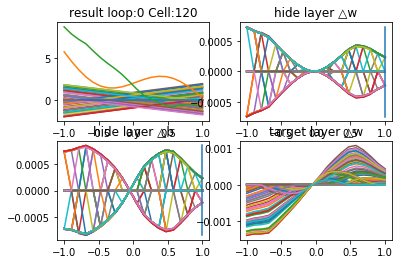

In [0]:
if __name__ == "__main__":
    # run3DDraw()
    # run3D_DNN()
    run2D_DNN()